---

### Uczenie Maszynowe Część 5

##### Wprowadzenie do uczenia nienadzorowanego. Problem szukania podobieństw. Klasteryzacja.

---

```






```

---

##### Zadania

---

```

````

---

>Zadanie 1. Segmentacja obrazu za pomocą algorytmu k-średnich.

>> Wczytanie Danych:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

image_path = 'palm_tree.jpg'
image = cv2.imread(image_path)

#pip install numpy scikit-learn matplotlib opencv-python

>>1.1. Wyświetlenie kodów RGB dla każdego piksela.

In [2]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print("Wartości pikseli (RGB):")
print(image_rgb)

Wartości pikseli (RGB):
[[[ 28  35  63]
  [ 35  50  83]
  [ 98 118 153]
  ...
  [  3   3   3]
  [  3   3   3]
  [  3   3   3]]

 [[ 25  29  56]
  [ 36  47  79]
  [ 98 117 150]
  ...
  [  3   3   3]
  [  3   3   3]
  [  4   4   4]]

 [[ 25  23  47]
  [ 36  43  72]
  [ 98 113 146]
  ...
  [  3   3   3]
  [  4   4   4]
  [  4   4   4]]

 ...

 [[ 46  32  31]
  [ 44  30  29]
  [ 49  34  31]
  ...
  [ 35  25  23]
  [ 36  26  24]
  [ 36  26  24]]

 [[ 36  20  20]
  [ 47  31  31]
  [ 59  41  39]
  ...
  [ 42  32  30]
  [ 39  29  27]
  [ 37  27  25]]

 [[ 41  27  26]
  [ 49  33  33]
  [ 58  40  38]
  ...
  [ 59  43  43]
  [ 51  37  36]
  [ 46  32  31]]]


>>1.2. Wyświetlenie oryginalnego zdjęcia.

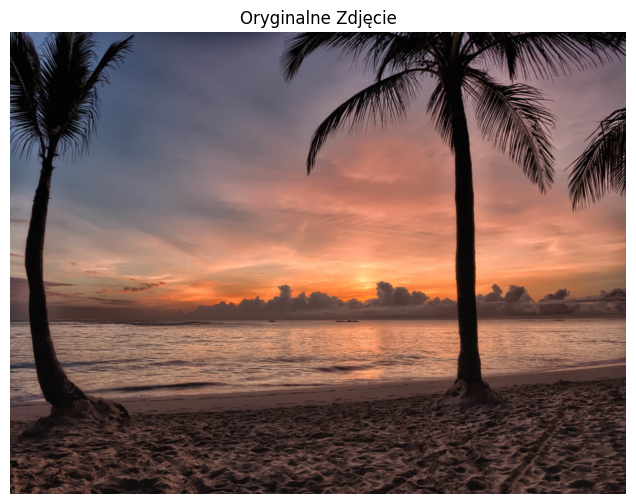

In [3]:
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title("Oryginalne Zdjęcie")
plt.axis("off")
plt.show()

>>1.3. Wykonanie kwantyzacji kolorów za pomocą algorytmu k-średnich.

In [4]:
from sklearn.cluster import KMeans

>>1.4. Wyświetlenie rozmiarów zdjęcia i liczbę kanałów kolorów (RGB).

In [5]:
height, width, channels = image_rgb.shape
print(f"Rozmiar zdjęcia: {width}x{height}, Liczba kanałów: {channels}")

Rozmiar zdjęcia: 1100x825, Liczba kanałów: 3


>>1.5. Przekształcenie danych z formatu 3D (w, h, c) do 2D (w * h, c).

In [6]:
pixels = image_rgb.reshape(-1, channels)  # Wymiary: (width * height, channels)
print(f"Wymiary obrazu po przekształceniu do 2D: {pixels.shape}")

Wymiary obrazu po przekształceniu do 2D: (907500, 3)


>>1.6. Zastosowanie algorytm k-średnich dla 6 klastrów.

In [7]:
kmeans = KMeans(n_clusters=6, random_state=42)

kmeans.fit(pixels)

# Ocena klasteryzacji
print(f"Inercja (suma odległości do centroidów): {round(kmeans.inertia_, 4)}")

Inercja (suma odległości do centroidów): 530200029.649


>>1.7. Wyświetlenie etykiet klastrów dla każdego piksela.

In [8]:
labels = kmeans.predict(pixels)

print(f"Etykiety klastrów dla każdego piksela (fragment): {labels}")

Etykiety klastrów dla każdego piksela (fragment): [4 1 2 ... 1 1 4]


>>1.8. Wyświetlenie współrzędne centroidów.

In [9]:
centroids = kmeans.cluster_centers_

print("Współrzędne centroidów przed zaokrągleniem:")
print(centroids)

Współrzędne centroidów przed zaokrągleniem:
[[144.16113952 115.8572963  112.09586089]
 [ 76.52839599  55.35968422  53.07647424]
 [ 99.65330218  94.73421167 108.62392137]
 [234.204125   154.64958728 114.29867123]
 [ 24.1517086   16.59534821  16.31434705]
 [185.27100511 130.96160228 111.25947998]]


>>1.9. Zaokrąglenie współrzędnych centroidów (kolory) do 0 miejsc po przecinku.

In [10]:
centroids = np.round(centroids, 0).astype(int)

print("Współrzędne centroidów po zaokrągleniu:")
print(centroids)

Współrzędne centroidów po zaokrągleniu:
[[144 116 112]
 [ 77  55  53]
 [100  95 109]
 [234 155 114]
 [ 24  17  16]
 [185 131 111]]


>>1.10. Utworzenie skwantyzowanego obrazu, zamieniając każdy piksel na odpowiadający mu kolor centroidu.

In [11]:
quantized_image = centroids[labels].reshape(height, width, channels)

>>1.11. Wyświetlenie obrazu po kwantyzacji.

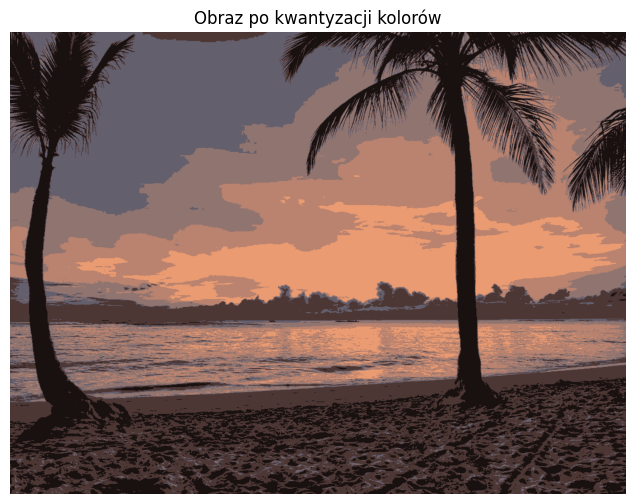

In [12]:
plt.figure(figsize=(8, 6))
plt.imshow(quantized_image)
plt.title("Obraz po kwantyzacji kolorów")
plt.axis("off")
plt.show()

---

```




```

---

>Zadanie 2. Zbiór danych iris.csv:

>>2.1. Wczytanie danych.

In [13]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('iris.csv', sep=r',') 

#Wywołanie obiektu df
data

#pip install pandas seaborn

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


>>2.2. Sprawdzenie kompletności danych.

In [14]:
data.info()

data_types = data.dtypes
print("\nTypy Danych:")
print(data_types)

duplicate_rows = data[data.duplicated()]
print("\nDublikaty:")
print(duplicate_rows)

null_mask = data.isnull().any(axis=1)
null_rows = data[null_mask]

print("\nTutaj najpierw stosujemy isnull()metodę do całej ramki danych, która zwraca maskę logiczną wskazującą, czy każdy element jest nullem, czy nie. \nNastępnie stosujemy any(axis=1)metodę do wyniku, aby sprawdzić, czy jakakolwiek wartość w każdym wierszu jest nullem. \nNa koniec używamy tej maski logicznej, aby wybrać wiersze, które mają wartości null.\n\n",null_rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Typy Danych:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Dublikaty:
     sepal_length  sepal_width  petal_length  petal_width    species
34            4.9          3.1           1.5          0.1     setosa
37            4.9          3.1           1.5          0.1     setosa
142           5.8          2.7           5.1          1.9  virginica

Tutaj najpierw stosujemy isnull()metodę do całej ramki danych, która zwraca maskę logiczną wskazującą, czy

>>2.3. Sprawdzenie statystyk podstawowych, informacji nt. danych.

In [15]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


>>2.4. Wykres punktowy zależności długości płatka w funkcji szerokości płatka.

<Axes: title={'center': '\nWykres punktowy zależności długości płatka w funkcji szerokości płatka.\n'}, xlabel='petal_length', ylabel='petal_width'>

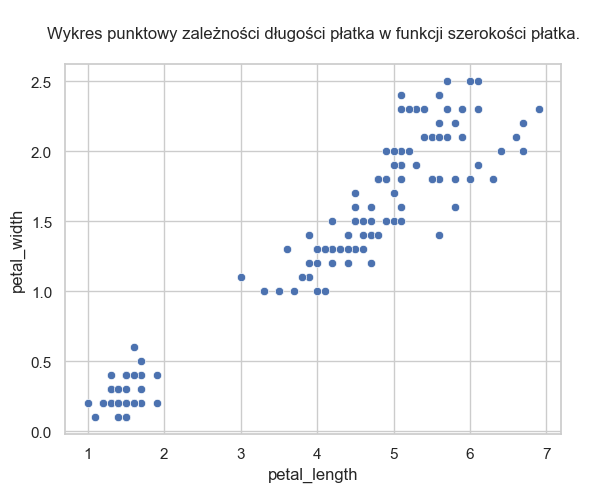

In [16]:
sns.set(style='whitegrid')
plt.title('\nWykres punktowy zależności długości płatka w funkcji szerokości płatka.\n')
sns.scatterplot(data=data, x='petal_length', y='petal_width')

```
Zbiór można podzielić na 2 ilości skupień.
```

>>2.5. Wykres punktowy zależności długości płatka w funkcji szerokości płatka, dane różnicowane za pomocą gatunku/rodzaju.

<Axes: title={'center': '\nWykres punktowy zależności długości płatka w funkcji szerokości płatka, dane różnicowane za pomocą gatunku/rodzaju.\n'}, xlabel='petal_length', ylabel='petal_width'>

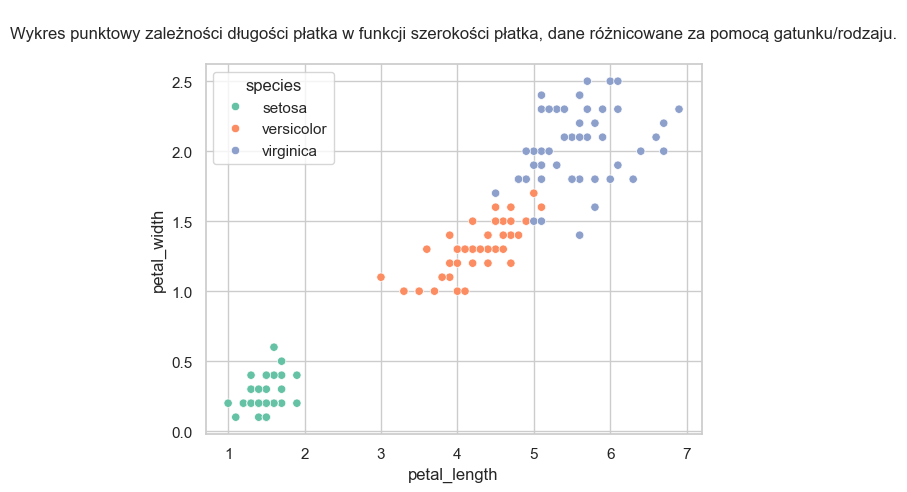

In [17]:
sns.set(style='whitegrid')
plt.title('\nWykres punktowy zależności długości płatka w funkcji szerokości płatka, dane różnicowane za pomocą gatunku/rodzaju.\n')
sns.scatterplot(data=data, x='petal_length', y='petal_width', hue='species', palette='Set2')

>>2.6. Obiekt df_iris z usunięta kolumna 'species'.

In [18]:
df_iris = data.drop(columns=['species'])

df_iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


>>2.7. Obiekt df_iris_std , gdzie dane wejściowe zestandaryzowane.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_iris_std = pd.DataFrame(scaler.fit_transform(df_iris), columns=df_iris.columns)

df_iris_std

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


>>2.8. Obiekt df_iris_norm dane wejściowe znormalizowane w zakresie [0,1].

In [20]:
from sklearn.preprocessing import MinMaxScaler

sc_minmax = MinMaxScaler()
df_iris_norm = pd.DataFrame(sc_minmax.fit_transform(df_iris), columns=df_iris.columns)

df_iris_norm

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


>>2.9. Trzy heatmap'y.

In [21]:
plt.figure(figsize=(16, 6))

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

>>>a. dane wejściowe (punkt 2.6),

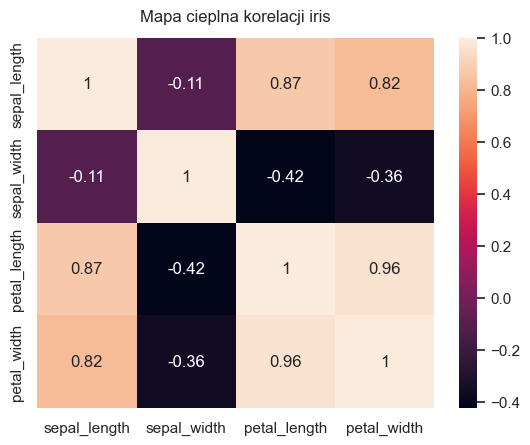

In [22]:
heatmap = sns.heatmap(df_iris.corr(), annot=True)
heatmap.set_title('Mapa cieplna korelacji iris', fontdict={'fontsize':12}, pad=12);

>>>b. dane zestandaryzowane (punkt 2.7),

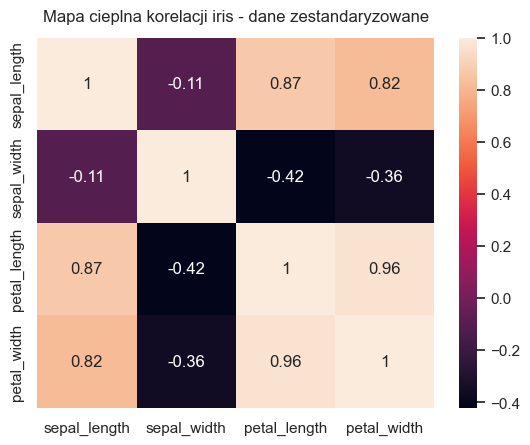

In [23]:
heatmap = sns.heatmap(df_iris_std.corr(), annot=True)
heatmap.set_title('Mapa cieplna korelacji iris - dane zestandaryzowane', fontdict={'fontsize':12}, pad=12);

>>>c. dane znormalizowane (punkt 2.8).

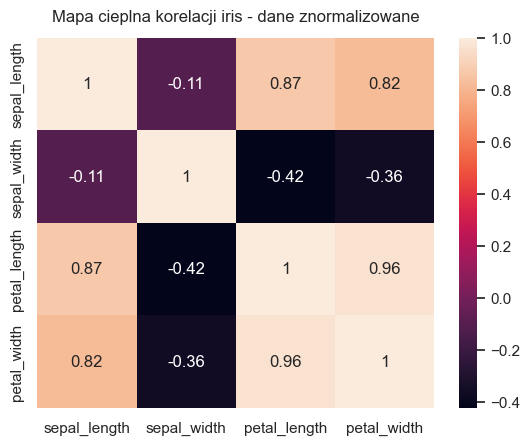

In [24]:
heatmap = sns.heatmap(df_iris_norm.corr(), annot=True)
heatmap.set_title('Mapa cieplna korelacji iris - dane znormalizowane', fontdict={'fontsize':12}, pad=12);

>>2.10. Dla danych oryginalnych:

>>>2.10.1. Algorytm hierarchiczny metody aglomeracyjnej dla odpowiedniej liczby grup, dla 3 metod łączenia:

>>>>a. Warda,

In [25]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

model_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')

df_iris[f'cluster_ward'] = model_ward.fit_predict(df_iris)
score = silhouette_score(df_iris, df_iris[f'cluster_ward'])

print(f"Wynik profilu dla metody ward: {round(score, 4)}")

Wynik profilu dla metody ward: 0.6851


>>>>b. pojedynczego połączenia,

In [26]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

model_single = AgglomerativeClustering(n_clusters=3, linkage='single')

df_iris[f'cluster_single'] = model_single.fit_predict(df_iris)
score = silhouette_score(df_iris, df_iris[f'cluster_single'])

print(f"Wynik profilu dla metody single: {round(score, 4)}")

Wynik profilu dla metody single: 0.7033


>>>>c. całkowitego połączenia.

In [27]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

model_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')

df_iris[f'cluster_complete'] = model_complete.fit_predict(df_iris)
score = silhouette_score(df_iris, df_iris[f'cluster_complete'])

print(f"Wynik profilu dla metody complete: {round(score, 4)}")

Wynik profilu dla metody complete: 0.7277


In [28]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,cluster_ward,cluster_single,cluster_complete
0,5.1,3.5,1.4,0.2,1,2,2
1,4.9,3.0,1.4,0.2,1,2,2
2,4.7,3.2,1.3,0.2,1,2,2
3,4.6,3.1,1.5,0.2,1,2,2
4,5.0,3.6,1.4,0.2,1,2,2
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,1
146,6.3,2.5,5.0,1.9,0,1,0
147,6.5,3.0,5.2,2.0,2,0,1
148,6.2,3.4,5.4,2.3,2,0,1


>>>2.10.2. Algorytm k-średnich dla odpowiedniej liczby grup.

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)

df_iris['cluster_kmeans'] = kmeans.fit_predict(df_iris)
kmeans_score = silhouette_score(df_iris, df_iris['cluster_kmeans'])

print(f"Wynik profilu dla k-średnich: {round(kmeans_score, 4)}")

Wynik profilu dla k-średnich: 0.7613


In [30]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,cluster_ward,cluster_single,cluster_complete,cluster_kmeans
0,5.1,3.5,1.4,0.2,1,2,2,1
1,4.9,3.0,1.4,0.2,1,2,2,1
2,4.7,3.2,1.3,0.2,1,2,2,1
3,4.6,3.1,1.5,0.2,1,2,2,1
4,5.0,3.6,1.4,0.2,1,2,2,1
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,1,2
146,6.3,2.5,5.0,1.9,0,1,0,0
147,6.5,3.0,5.2,2.0,2,0,1,2
148,6.2,3.4,5.4,2.3,2,0,1,2


>>>2.10.3. Wynik profilu dla poszczególnych rozwiązań uzyskanych metodą
aglomeracyjną. Wynik profilu dla rozwiązań metodą k-średnich.

In [31]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

def clustering_analysis(df, data, n_clusters=3, random_state=0):

    """
    Parametry:
    df : oryginalny DataFrame, do którego dodane zostaną etykiety klastrów.
    data : zbiór danych (bez kolumny 'species') do analizy klasteryzacji.
    n_clusters: liczba klastrów (domyślnie 3).
    random_state : losowe ziarno dla algorytmu k-średnich (domyślnie 0).
    """
    
    results = {}
    methods = ['ward', 'single', 'complete']
    
    # Hierarchiczna klasteryzacja aglomeracyjna dla różnych metod łączenia
    for method in methods:
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
        df[f'cluster_{method}'] = model.fit_predict(data)
        score = silhouette_score(data, df[f'cluster_{method}'])
        results[f'silhouette_{method}'] = score
        print(f"Wynik profilu dla metody {method}: {round(score, 4)}")

    # Algorytm k-średnich
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    df['cluster_kmeans'] = kmeans.fit_predict(data)
    kmeans_score = silhouette_score(data, df['cluster_kmeans'])
    results['silhouette_kmeans'] = kmeans_score
    print(f"Wynik profilu dla k-średnich: {round(kmeans_score, 4)}")

    return results

# Wywołanie funkcji:
results = clustering_analysis(df_iris, df_iris)

Wynik profilu dla metody ward: 0.7613
Wynik profilu dla metody single: 0.7613
Wynik profilu dla metody complete: 0.7613
Wynik profilu dla k-średnich: 0.7451


>>>2.10.4. Wykres punktowy zależności długości płatka w funkcji szerokości płatka:

>>>>dane różnicowane za pomocą etykiet nadanych za pomocą algorytmu hierarchicznego
dla każdej metody łączenia.

<Axes: title={'center': '\nWykres punktowy zależności długości płatka w funkcji szerokości płatka ,dane różnicowane za pomocą metody ward.\n'}, xlabel='petal_length', ylabel='petal_width'>

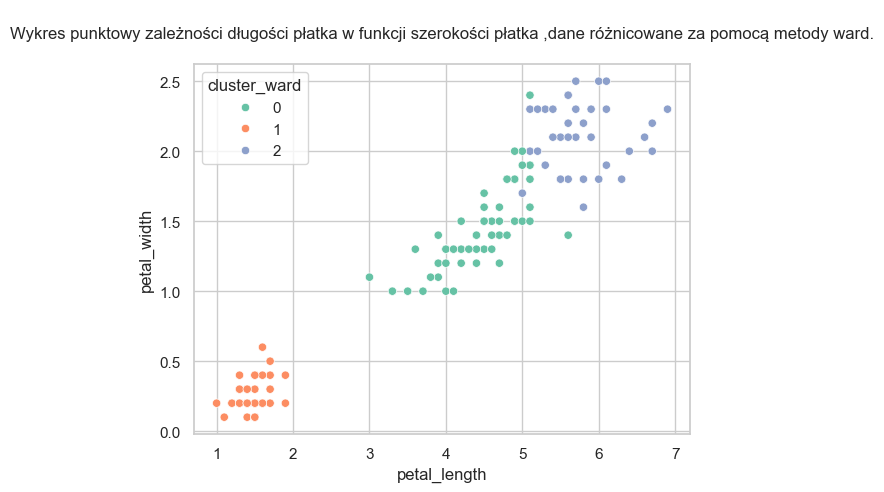

In [32]:
sns.set(style='whitegrid')
plt.title('\nWykres punktowy zależności długości płatka w funkcji szerokości płatka ,dane różnicowane za pomocą metody ward.\n')
sns.scatterplot(data=df_iris, x='petal_length', y='petal_width', hue='cluster_ward', palette='Set2')

<Axes: title={'center': '\nWykres punktowy zależności długości płatka w funkcji szerokości płatka ,dane różnicowane za pomocą pojedynczego połączenia.\n'}, xlabel='petal_length', ylabel='petal_width'>

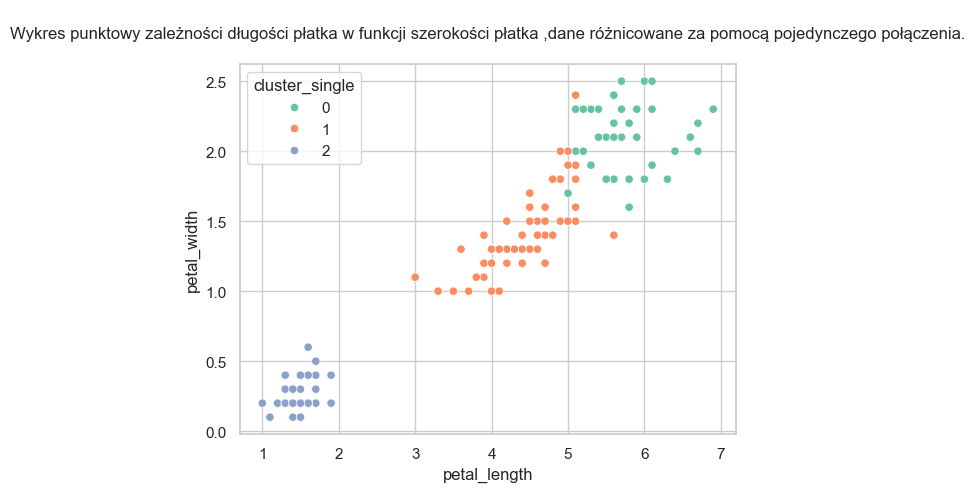

In [33]:
sns.set(style='whitegrid')
plt.title('\nWykres punktowy zależności długości płatka w funkcji szerokości płatka ,dane różnicowane za pomocą pojedynczego połączenia.\n')
sns.scatterplot(data=df_iris, x='petal_length', y='petal_width', hue='cluster_single', palette='Set2')

<Axes: title={'center': '\nWykres punktowy zależności długości płatka w funkcji szerokości płatka ,dane różnicowane za pomocą całkowitego połączenia.\n'}, xlabel='petal_length', ylabel='petal_width'>

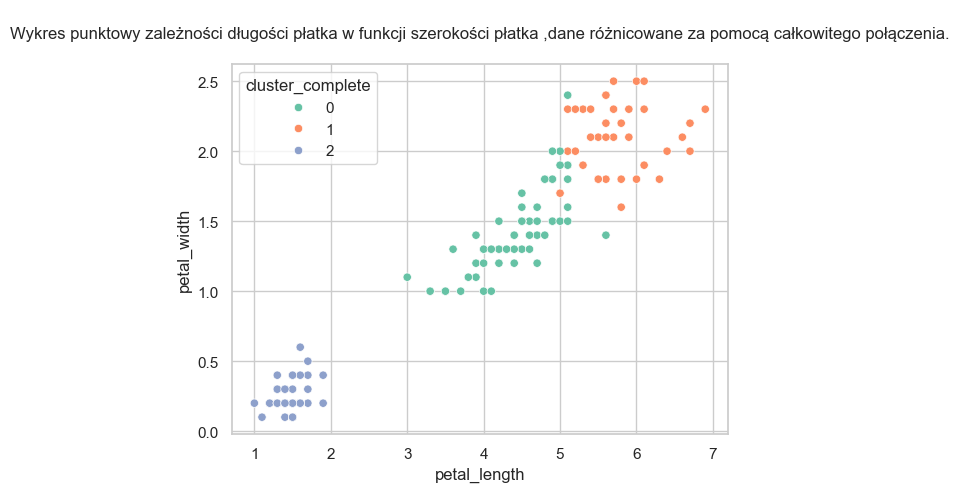

In [34]:
sns.set(style='whitegrid')
plt.title('\nWykres punktowy zależności długości płatka w funkcji szerokości płatka ,dane różnicowane za pomocą całkowitego połączenia.\n')
sns.scatterplot(data=df_iris, x='petal_length', y='petal_width', hue='cluster_complete', palette='Set2')

>>>>dane różnicowane za pomocą etykiet nadanych za pomocą algorytmu k-średnich.

<Axes: title={'center': '\nWykres punktowy zależności długości płatka w funkcji szerokości płatka ,dane różnicowane za pomocą algorytmu k-średnich.\n'}, xlabel='petal_length', ylabel='petal_width'>

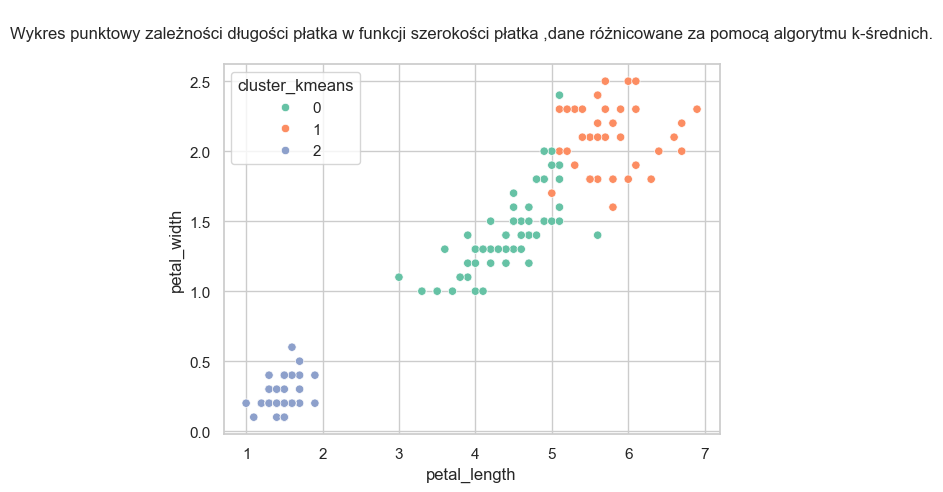

In [35]:
sns.set(style='whitegrid')
plt.title('\nWykres punktowy zależności długości płatka w funkcji szerokości płatka ,dane różnicowane za pomocą algorytmu k-średnich.\n')
sns.scatterplot(data=df_iris, x='petal_length', y='petal_width', hue='cluster_kmeans', palette='Set2')

>>2.11. Dane zestandaryzowane z klasteryzacja.

Wynik profilu dla metody ward: 0.586
Wynik profilu dla metody single: 0.6219
Wynik profilu dla metody complete: 0.6686
Wynik profilu dla k-średnich: 0.6862


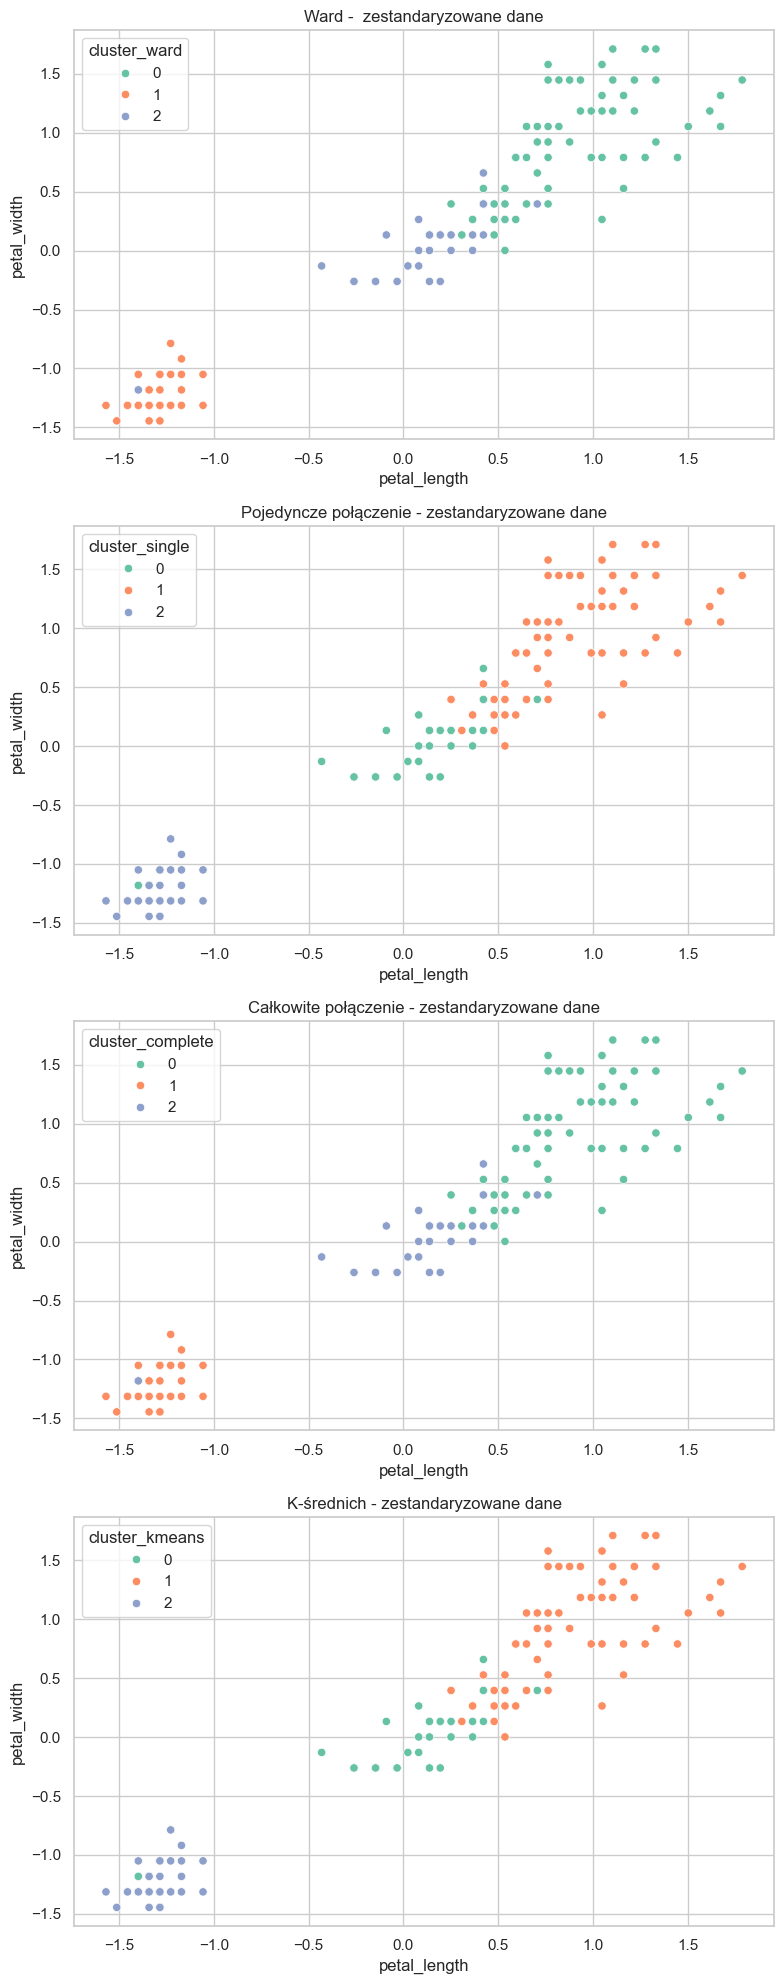

In [36]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def clustering_analysis(df, data, n_clusters=3, random_state=0):
    """
    Parametry:
    df : pd.DataFrame - Oryginalny DataFrame, do którego zostaną dodane etykiety klastrów.
    data : pd.DataFrame - Znormalizowany zbiór danych bez kolumny docelowej (np. 'species') do analizy klasteryzacji.
    n_clusters : int - Liczba klastrów (domyślnie 3).
    random_state : int - Losowe ziarno dla algorytmu k-średnich (domyślnie 0).

    """
    
    results = {}
    methods = ['ward', 'single', 'complete']
    
    # Hierarchiczna klasteryzacja aglomeracyjna dla różnych metod łączenia
    for method in methods:
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
        df[f'cluster_{method}'] = model.fit_predict(data)
        score = silhouette_score(data, df[f'cluster_{method}'])
        results[f'silhouette_{method}'] = round(score, 4)
        print(f"Wynik profilu dla metody {method}: {results[f'silhouette_{method}']}")

    # Algorytm k-średnich
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    df['cluster_kmeans'] = kmeans.fit_predict(data)
    kmeans_score = silhouette_score(data, df['cluster_kmeans'])
    results['silhouette_kmeans'] = round(kmeans_score, 4)
    print(f"Wynik profilu dla k-średnich: {results['silhouette_kmeans']}")
      
    return results

# Wywołanie funkcji
results = clustering_analysis(df_iris_std, df_iris_std)

# Ustawienia wyglądu wykresów
sns.set(style='whitegrid')

# Tworzenie wykresów dla klastrów różnych metod
fig, axes = plt.subplots(4, 1, figsize=(8, 20))

# Lista metod do wizualizacji
titles = ["Ward -  zestandaryzowane dane", "Pojedyncze połączenie - zestandaryzowane dane",
          "Całkowite połączenie - zestandaryzowane dane", "K-średnich - zestandaryzowane dane"]

# Tworzenie wykresów
for i, method in enumerate(['ward', 'single', 'complete', 'kmeans']):
    axes[i].set_title(titles[i])
    sns.scatterplot(data=df_iris_std, x='petal_length', y='petal_width', 
                    hue=f'cluster_{method}', palette='Set2', ax=axes[i])

# Dostosowanie układu i wyświetlenie wykresów
plt.tight_layout()
plt.show()

>>2.12. Dane znormalizowane z klasteryzacja.

Wynik profilu dla metody ward: 0.7957
Wynik profilu dla metody single: 0.8645
Wynik profilu dla metody complete: 0.8895
Wynik profilu dla k-średnich: 0.9004


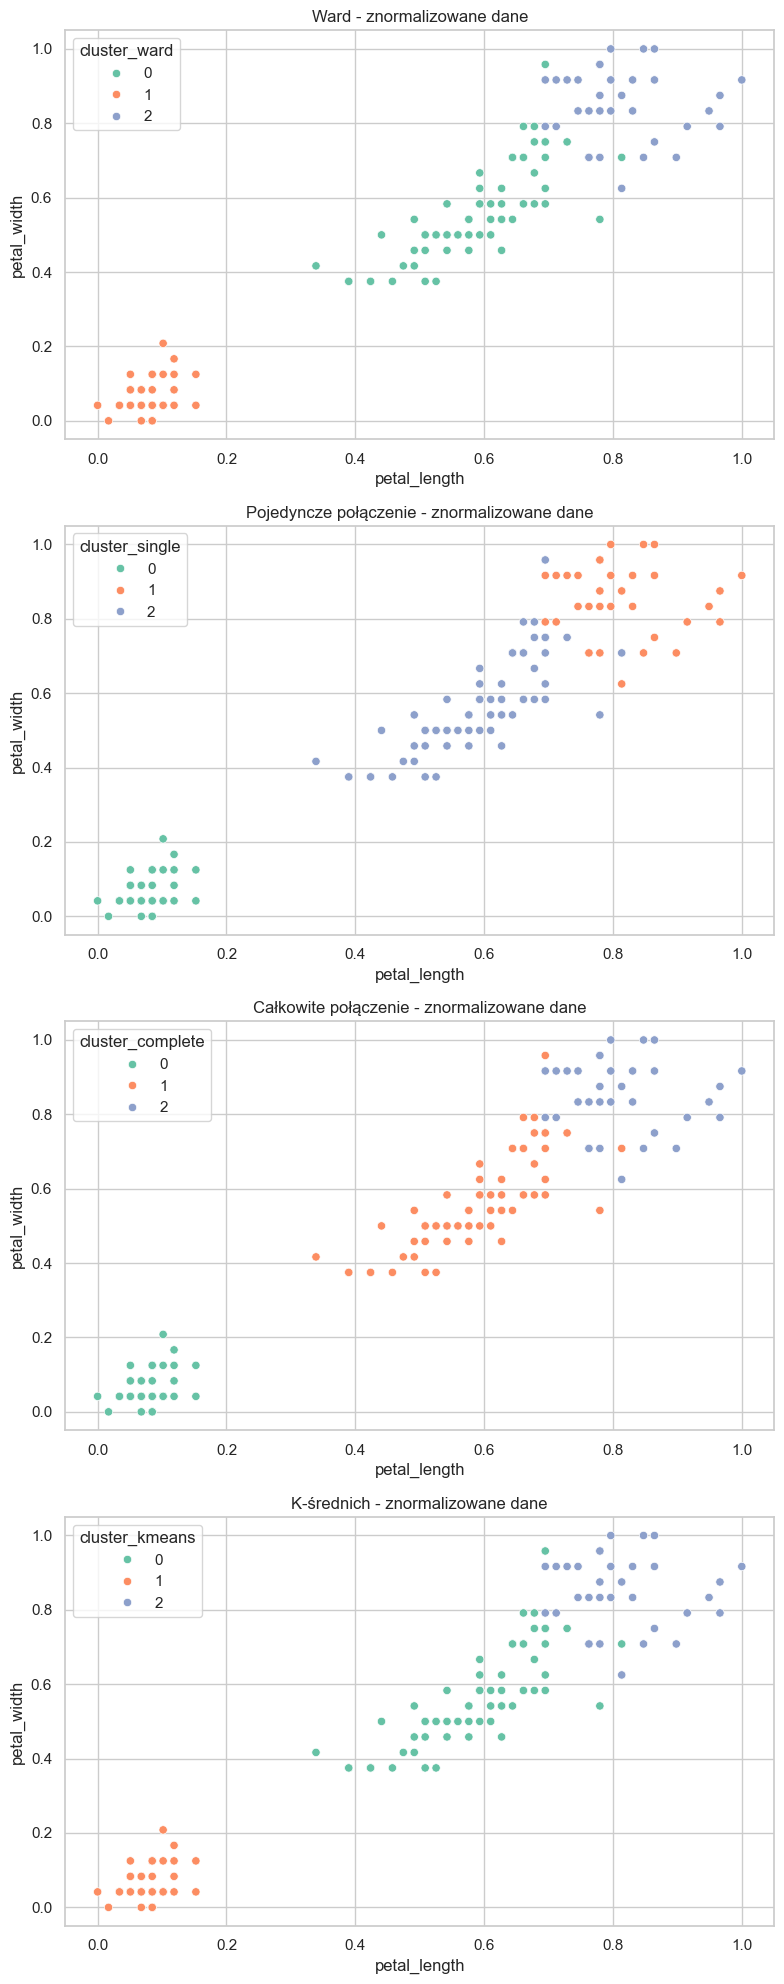

In [37]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def clustering_analysis(df, data, n_clusters=3, random_state=0):
    """
    Parametry:
    df : pd.DataFrame - Oryginalny DataFrame, do którego zostaną dodane etykiety klastrów.
    data : pd.DataFrame - Znormalizowany zbiór danych bez kolumny docelowej (np. 'species') do analizy klasteryzacji.
    n_clusters : int - Liczba klastrów (domyślnie 3).
    random_state : int - Losowe ziarno dla algorytmu k-średnich (domyślnie 0).

    """
    
    results = {}
    methods = ['ward', 'single', 'complete']
    
    # Hierarchiczna klasteryzacja aglomeracyjna dla różnych metod łączenia
    for method in methods:
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
        df[f'cluster_{method}'] = model.fit_predict(data)
        score = silhouette_score(data, df[f'cluster_{method}'])
        results[f'silhouette_{method}'] = round(score, 4)
        print(f"Wynik profilu dla metody {method}: {results[f'silhouette_{method}']}")

    # Algorytm k-średnich
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    df['cluster_kmeans'] = kmeans.fit_predict(data)
    kmeans_score = silhouette_score(data, df['cluster_kmeans'])
    results['silhouette_kmeans'] = round(kmeans_score, 4)
    print(f"Wynik profilu dla k-średnich: {results['silhouette_kmeans']}")
      
    return results

# Wywołanie funkcji
results = clustering_analysis(df_iris_norm, df_iris_norm)

# Ustawienia wyglądu wykresów
sns.set(style='whitegrid')

# Tworzenie wykresów dla klastrów różnych metod
fig, axes = plt.subplots(4, 1, figsize=(8, 20))

# Lista metod do wizualizacji
titles = ["Ward - znormalizowane dane", "Pojedyncze połączenie - znormalizowane dane",
          "Całkowite połączenie - znormalizowane dane", "K-średnich - znormalizowane dane"]

# Tworzenie wykresów
for i, method in enumerate(['ward', 'single', 'complete', 'kmeans']):
    axes[i].set_title(titles[i])
    sns.scatterplot(data=df_iris_norm, x='petal_length', y='petal_width', 
                    hue=f'cluster_{method}', palette='Set2', ax=axes[i])

# Dostosowanie układu i wyświetlenie wykresów
plt.tight_layout()
plt.show()

>>>Procentowe określenie liczby etykiet przypisanych za pomocą
poszczególnych algorytmów klasteryzacji w odniesieniu do ilość kwiatów reprezentujących
poszczególne gatunki.

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd

labels_true = data['species'] 

label_encoder = LabelEncoder()
labels_true_encoded = label_encoder.fit_transform(labels_true) 

def calculate_cluster_percentage(labels_true, labels_pred):
    confusion = confusion_matrix(labels_true, labels_pred)
    cluster_percentage = (confusion / confusion.sum(axis=1, keepdims=True)) * 100
    return cluster_percentage

results = {
    "originalne": {},
    "zestandaryzowane": {},
    "znormalizowane": {}
}

for data_version, df_version in zip(
    ["originalne", "zestandaryzowane", "znormalizowane"],
    [df_iris, df_iris_std, df_iris_norm]
):
    # K-means
    labels_pred_kmeans = df_version['cluster_kmeans']
    results[data_version]["kmeans"] = calculate_cluster_percentage(labels_true_encoded, labels_pred_kmeans)

    # Metody: Ward, single, i complete 
    for method in ["ward", "single", "complete"]:
        labels_pred = df_version[f'cluster_{method}']
        results[data_version][method] = calculate_cluster_percentage(labels_true_encoded, labels_pred)

for data_version, algorithms in results.items():
    print(f"\n\nProcentowe wyniki klastrowania danych: {data_version}")
    for algorithm, cluster_percentages in algorithms.items():
        print(f"\nAlgorytm: {algorithm}")
        print("Procentowe przypisanie klastra do gatunku:")
        cluster_df = pd.DataFrame(
            cluster_percentages, 
            index=label_encoder.classes_, 
            columns=[f'Klaster {i+1}' for i in range(cluster_percentages.shape[1])]
        )
        print(cluster_df)



Procentowe wyniki klastrowania danych: originalne

Algorytm: kmeans
Procentowe przypisanie klastra do gatunku:
            Klaster 1  Klaster 2  Klaster 3
setosa            0.0        0.0      100.0
versicolor       98.0        2.0        0.0
virginica        30.0       70.0        0.0

Algorytm: ward
Procentowe przypisanie klastra do gatunku:
            Klaster 1  Klaster 2  Klaster 3
setosa            0.0      100.0        0.0
versicolor       98.0        0.0        2.0
virginica        30.0        0.0       70.0

Algorytm: single
Procentowe przypisanie klastra do gatunku:
            Klaster 1  Klaster 2  Klaster 3
setosa            0.0        0.0      100.0
versicolor        2.0       98.0        0.0
virginica        70.0       30.0        0.0

Algorytm: complete
Procentowe przypisanie klastra do gatunku:
            Klaster 1  Klaster 2  Klaster 3
setosa            0.0        0.0      100.0
versicolor       98.0        2.0        0.0
virginica        30.0       70.0        0.0


```

```

---